In [17]:
import pandas as pd 
import math
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix


In [18]:
# import base et nettoyage
data = pd.read_csv('/home/samuel/Workspace/Playgrounds/Python-Playground/Road to 15k/credit.csv')

strtocat = ['Historique_credit',
            'Objet_credit',
            'Situation_familiale',
            'Garanties', 
            'Biens',
            'Autres_credits',
            'Statut_domicile',
            'Type_emploi',
            'Telephone']

def str_to_cat(column):
    uniques = column.unique()
    scale = {}
    for i in range(len(uniques)):
        scale[uniques[i]] = i  

    new_column = column.apply(lambda x: scale[x])
    return new_column

data.drop('Unnamed: 0', axis = 1, inplace=True)

for i in range(len(strtocat)):
    data[strtocat[i]] = str_to_cat(data[strtocat[i]])

In [19]:
# split
X = data.drop('Cible', axis=1)
y = data['Cible']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Accuracy : 0.6833333333333333
Confusion Matrix :
[[160  50]
 [ 45  45]]


54, 108.72, 'X[5] <= 2.5\ngini = 0.469\nsamples = 40\nvalue = [15, 25]'),
 Text(42.58421052631579, 94.22399999999999, 'X[4] <= 724.5\ngini = 0.424\nsamples = 36\nvalue = [11, 25]'),
 Text(35.242105263157896, 79.72799999999998, 'X[11] <= 2.0\ngini = 0.48\nsamples = 10\nvalue = [6, 4]'),
 Text(32.30526315789474, 65.232, 'X[3] <= 1.5\ngini = 0.245\nsamples = 7\nvalue = [6, 1]'),
 Text(29.368421052631582, 50.73599999999999, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(35.242105263157896, 50.73599999999999, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(38.178947368421056, 65.232, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(49.92631578947369, 79.72799999999998, 'X[5] <= 0.5\ngini = 0.311\nsamples = 26\nvalue = [5, 21]'),
 Text(44.05263157894737, 65.232, 'X[4] <= 1257.0\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(41.11578947368422, 50.73599999999999, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(46.98947368421053, 50.73599999999999, 'gini = 0.0\nsamples = 1\nvalue =

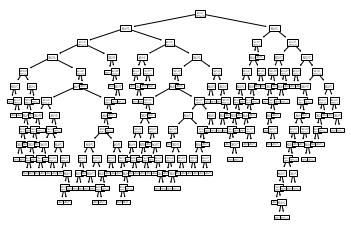

In [16]:
dt = DecisionTreeClassifier().fit(X_train, y_train)
y_pred = dt.predict(X_test)

acc = accuracy_score(y_test, y_pred)
conmat = confusion_matrix(y_test, y_pred)

print('Accuracy : %s'%acc)
print('Confusion Matrix :')
print(conmat)
plot_tree(dt)